In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
from keras import preprocessing

In [3]:
max_features=10000

In [4]:
maxlen = 20

In [5]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 8s 0us/step


In [8]:
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [9]:
len(x_train[0]),len(x_train[1])

(218, 189)

In [10]:
y_train[0],y_train[1]

(1, 0)

In [11]:
import numpy as np 
np.unique(y_train)

array([0, 1])

In [12]:
x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

In [13]:
x_train.shape,x_test.shape

((25000, 20), (25000, 20))

In [14]:
x_train[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32], dtype=int32)

# Model

In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

In [17]:
model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen))

In [18]:
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


# Learn

In [27]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])

# train

In [28]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 57us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 1s 45us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 1s 47us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 1s 45us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 1s 45us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - val_acc:

# looking at model history

In [33]:
acc=history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [35]:
import matplotlib.pyplot as plt
epochs = range(1,len(acc)+1)

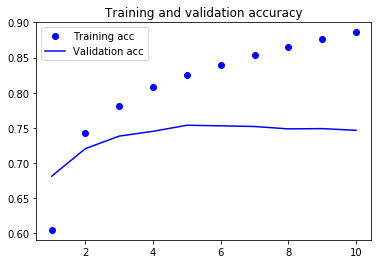

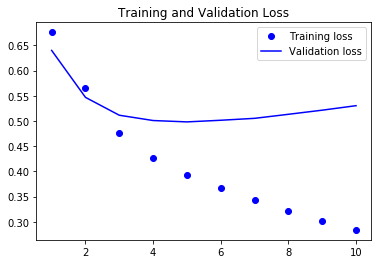

In [36]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()